### CAT CLASSIFIER

Train model to classify images into cats vs non cats.

Documentation: https://docs.fast.ai/tutorial.vision.html.

In [71]:
# Import python packages
from os import mkdir, walk, getcwd, path
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import fastai.vision.all as fva
import kagglehub

In [53]:
# Download cat vs non-cat image dataset from Kaggle
path_images = kagglehub.dataset_download("mriganksingh/cat-images-dataset")
print("Path to dataset files:", path_images)

Path to dataset files: C:\Users\chiar\.cache\kagglehub\datasets\mriganksingh\cat-images-dataset\versions\1


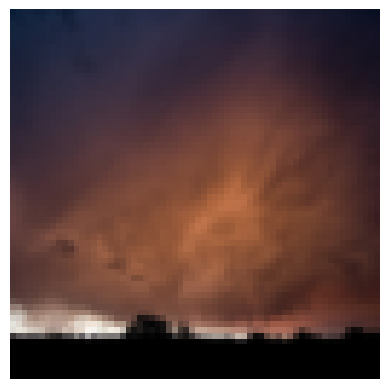

In [ ]:
# Convert hdf5 input file to labelled png images - works with the specific file above, other hdf5 files might have a different structure
def h5_to_png(filename, property_name):
    target_folder = property_name + "data"
    if not path.exists(target_folder):
        mkdir(target_folder)
    file = h5py.File(filename)
    label_dict = {i: str(file["list_classes"][i])[2:-1] for i in range(len(file["list_classes"]))}
    for i in range(len(file[property_name + "_set_x"])):
        image = file[property_name + "_set_x"][i]
        plt.axis("off")
        plt.imshow(image)
        plt.savefig(target_folder + "\\" + label_dict[int(file[property_name + "_set_y"][i])] + "_" + str(i) +  ".png", bbox_inches='tight', pad_inches=0)

h5_to_png(path_images+r"\test_catvnoncat.h5", "test")
h5_to_png(path_images+r"\train_catvnoncat.h5", "train")


#### Import data into FastAI


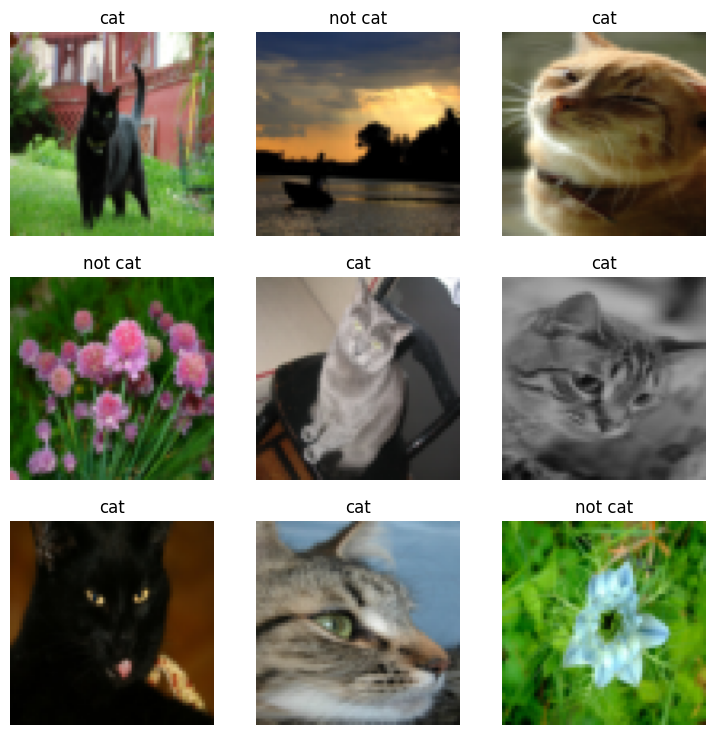

In [61]:
def label_function(filename): # determine image label based on filename
    if filename[0]=="n":
        return "not cat"
    else:
        return "cat"

path = Path(getcwd() + r'\traindata')
files = fva.get_image_files(path)
myDataLoader = fva.ImageDataLoaders.from_name_func(
    path,
    files,
    label_function,
    valid_pct = 0.2,
    item_tfms = fva.Resize(224)
)
myDataLoader.show_batch()

#### Define and train learner

In [62]:
# Initialize learner object with base model resnet34
learner = fva.vision_learner(
    myDataLoader,
    fva.resnet34,
    metrics=fva.accuracy
)

# Run training
learner.fine_tune(10)

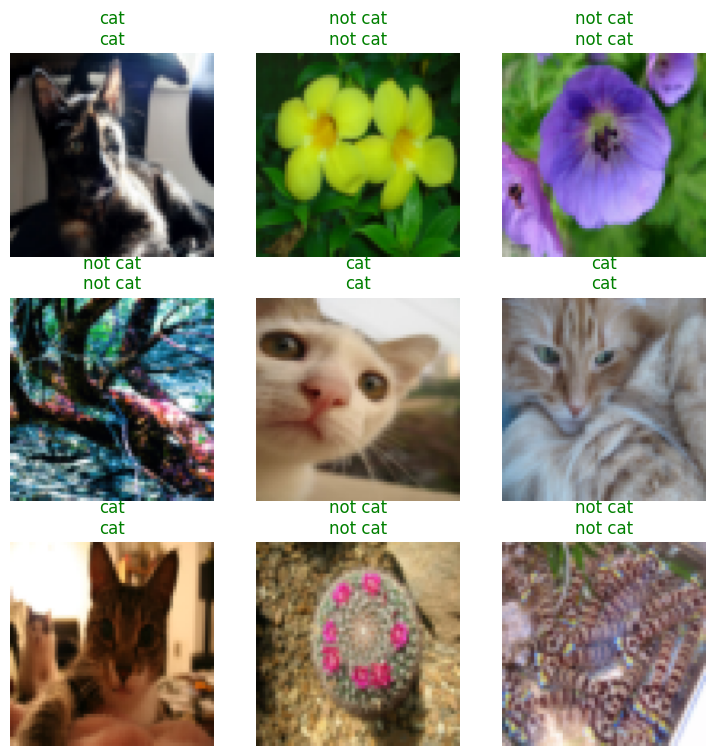

In [63]:
# Show a few results
learner.show_results(1)

#### Examine accuracy


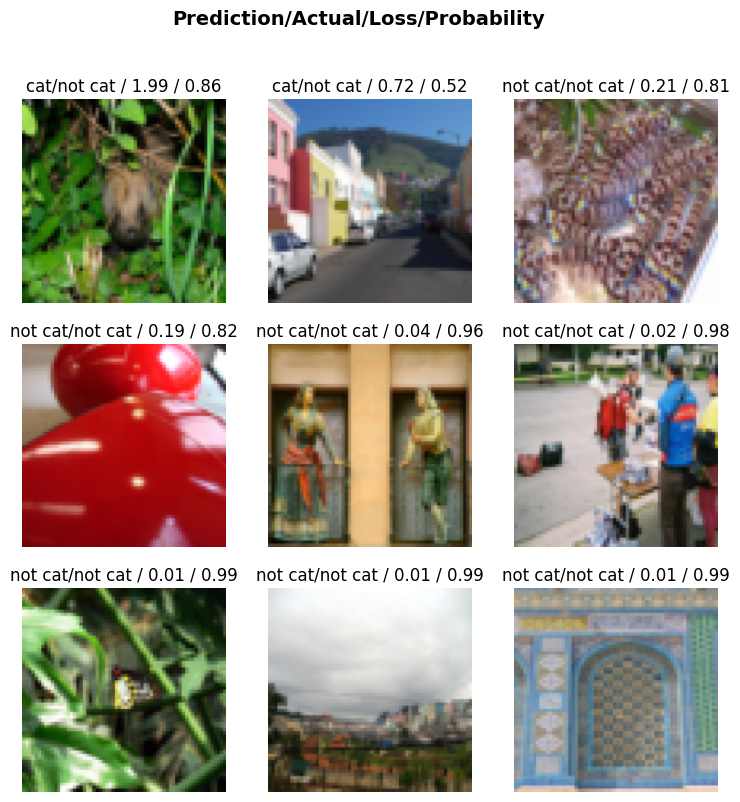

In [64]:
# Show 9 worst predictions
interp = fva.Interpretation.from_learner(learner)
interp.plot_top_losses(9)

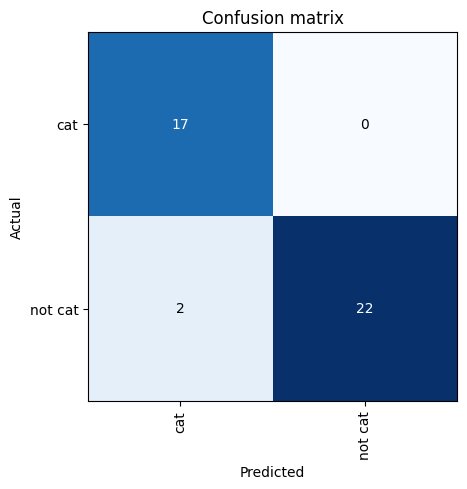

In [65]:
# Plot confusion matrix
class_interp = fva.ClassificationInterpretation.from_learner(learner)
class_interp.plot_confusion_matrix()

#### Test on independent data

In [78]:
def predict_catness(image_file):
    predicted_category, tensor, percentages = learner.predict(image_file)
    cat_percentage = 100*float(percentages[0])
    img = mpimg.imread(image_file)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Catness: %i%%" %(np.round(cat_percentage)))
    #print("Catness of " + image_file + ": %.2f%%" %(cat_percentage))
    plt.show()


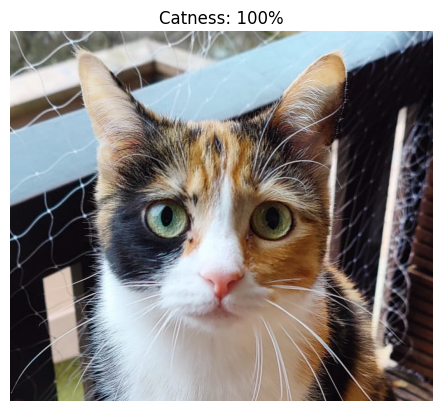

In [81]:
# Test with Nebi
predict_catness(getcwd() + r"\neb.png")

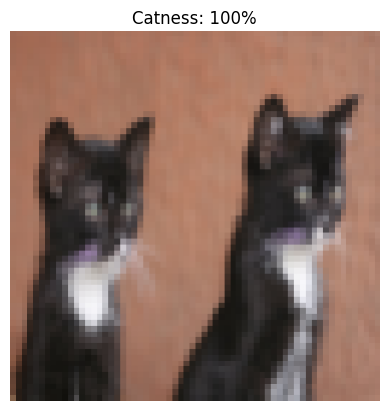

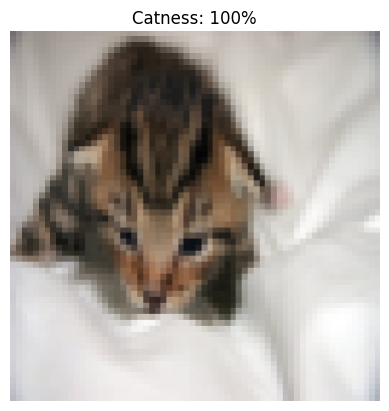

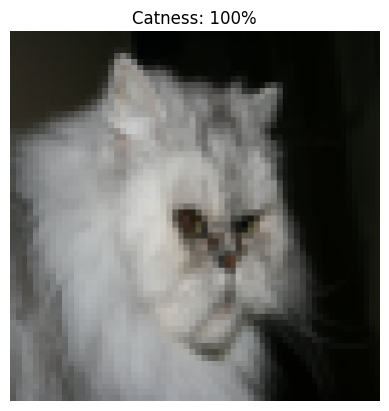

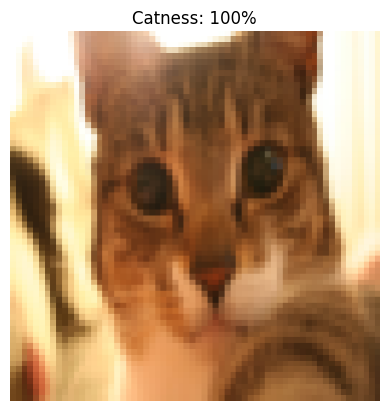

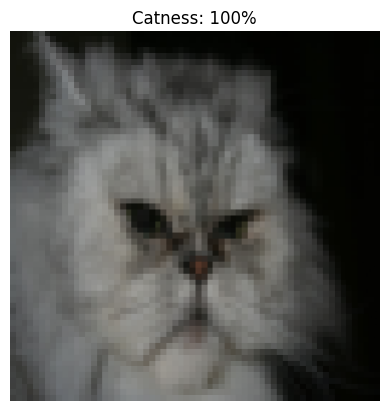

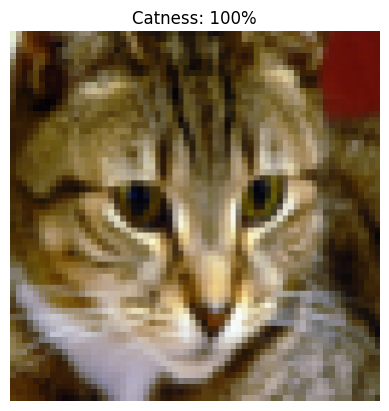

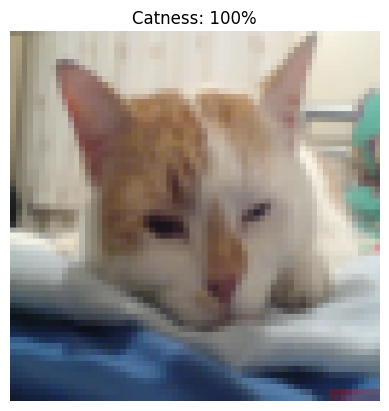

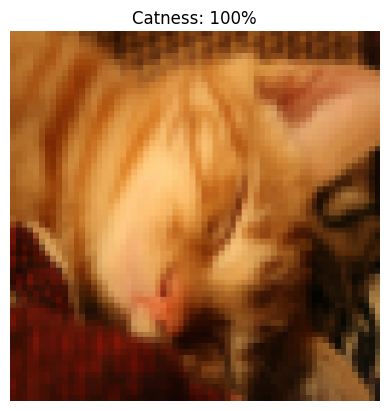

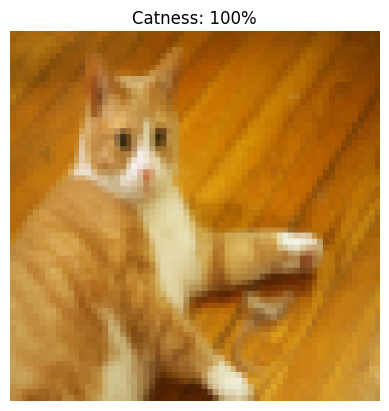

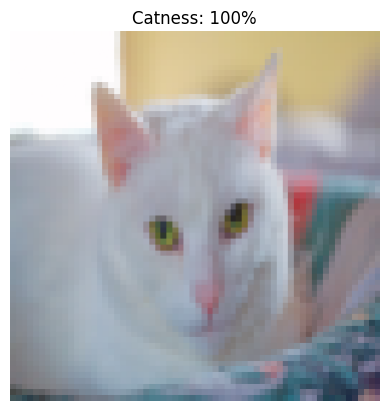

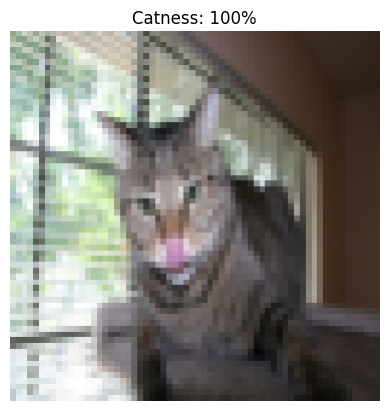

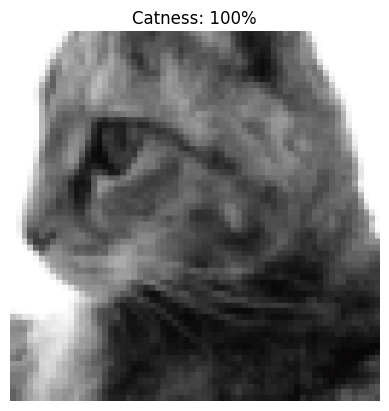

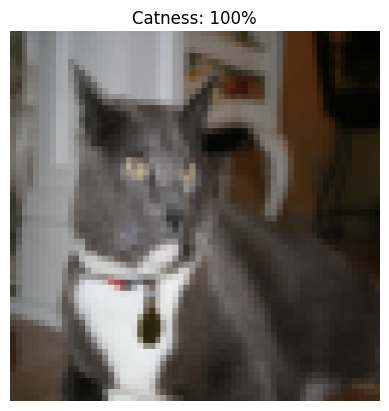

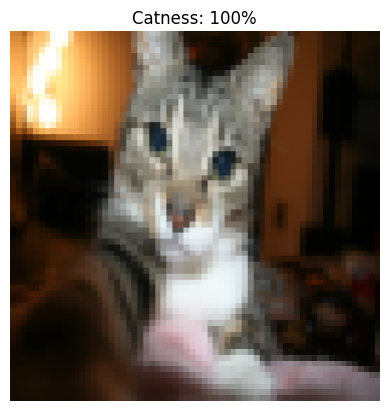

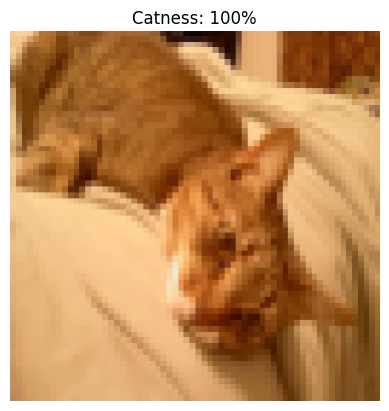

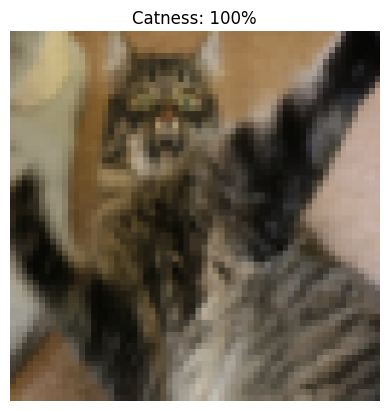

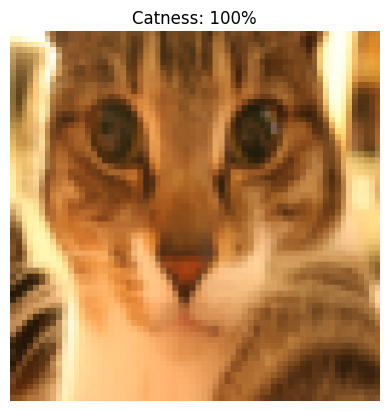

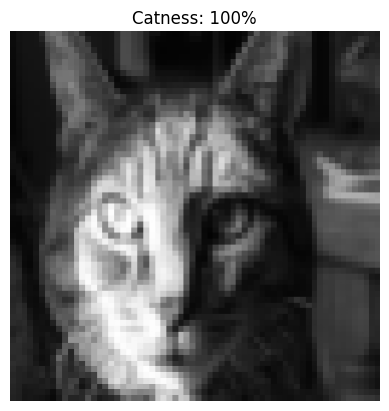

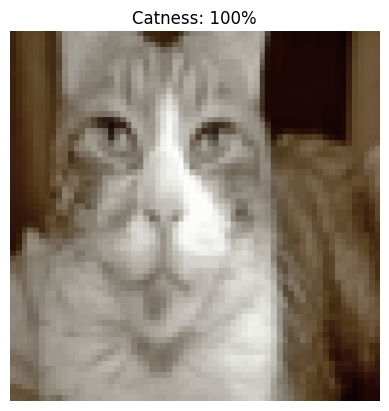

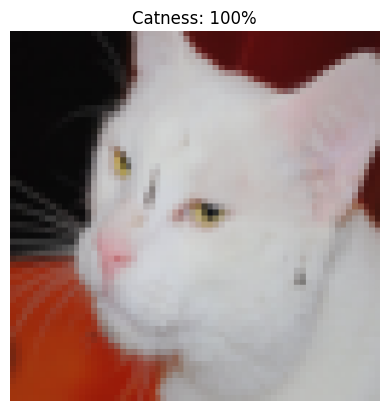

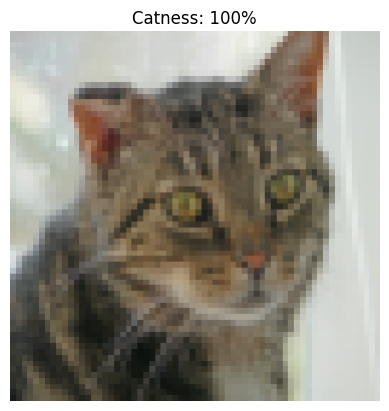

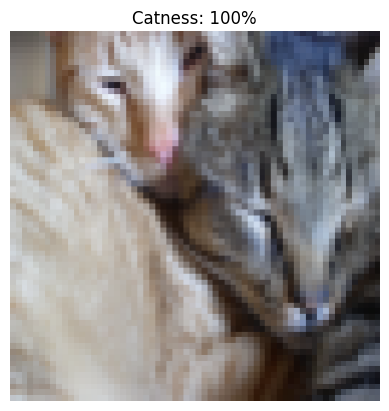

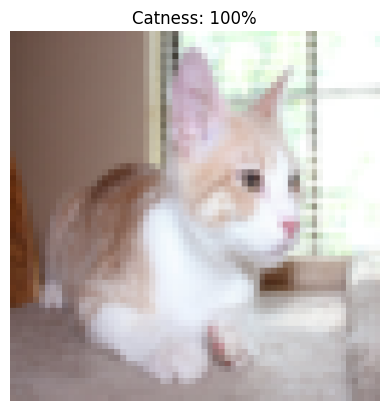

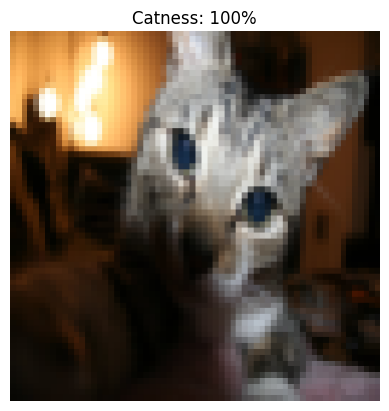

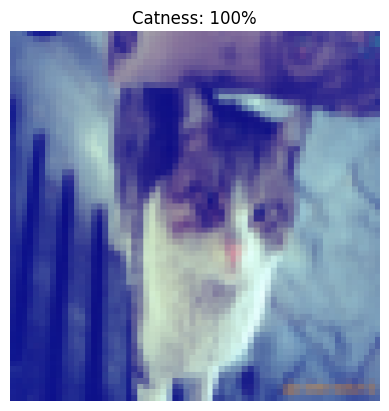

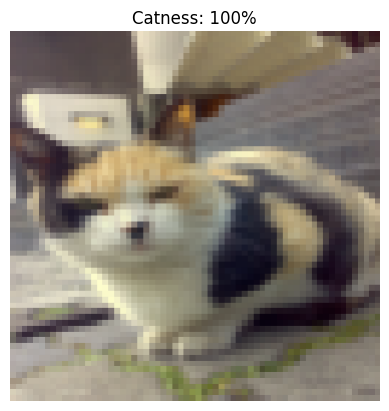

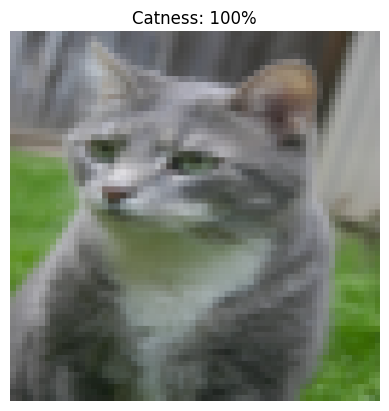

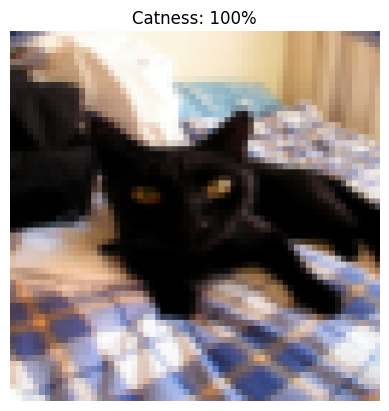

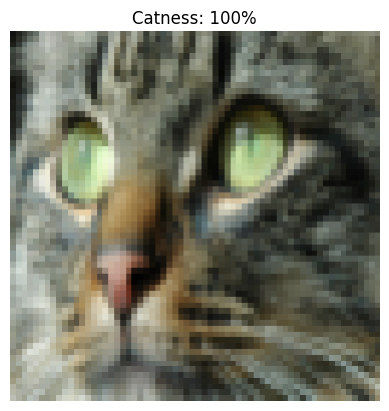

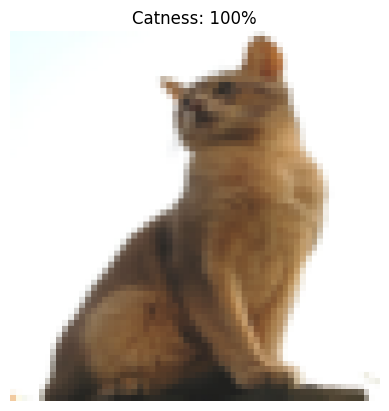

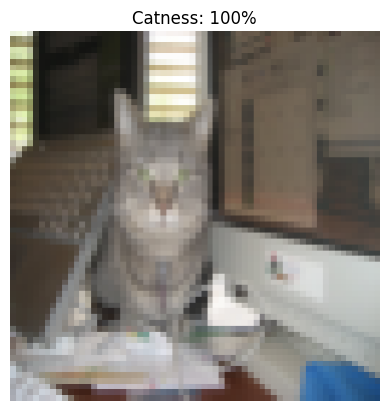

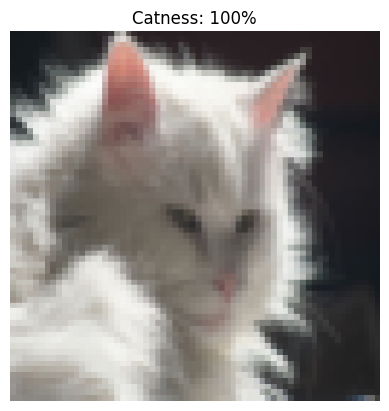

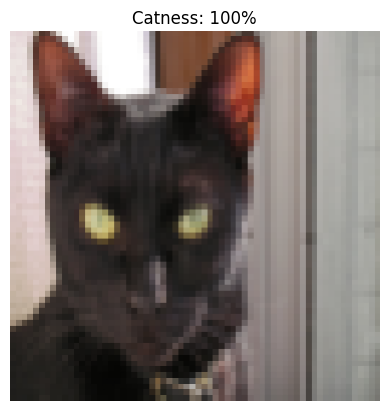

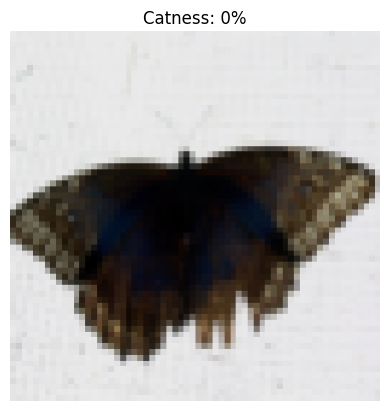

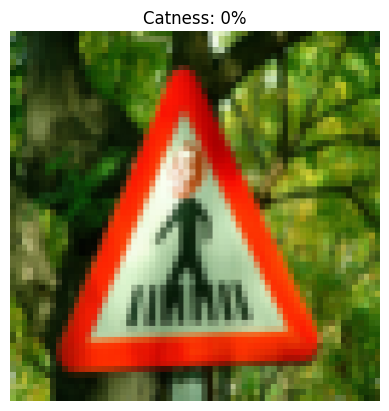

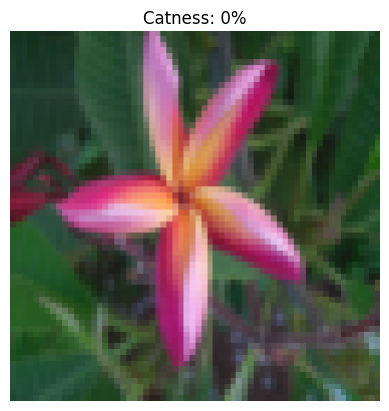

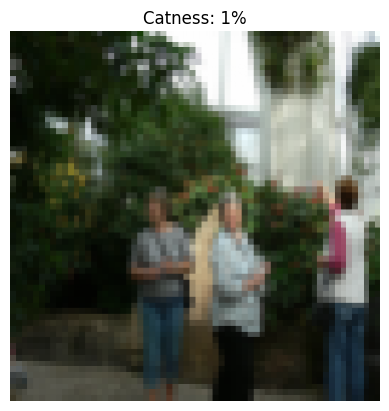

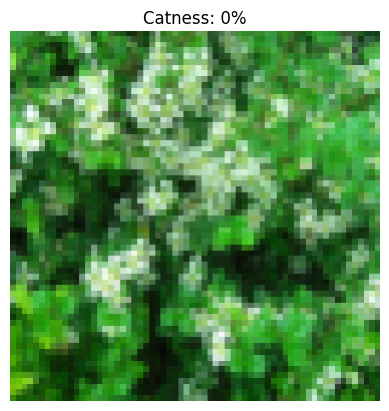

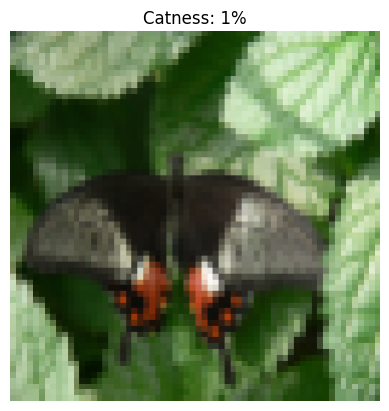

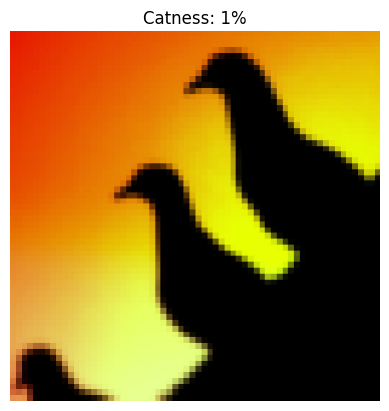

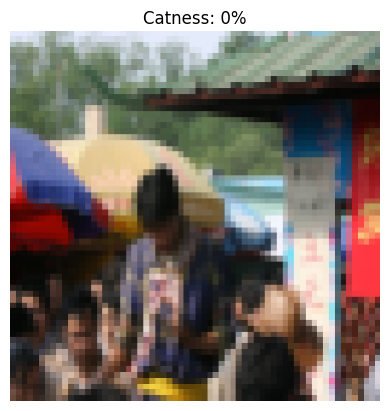

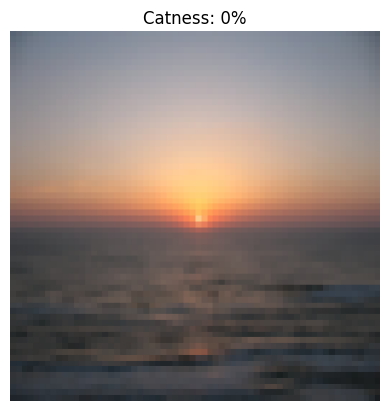

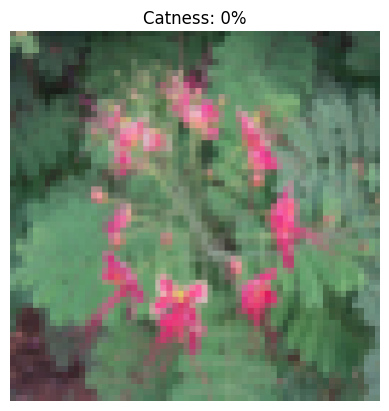

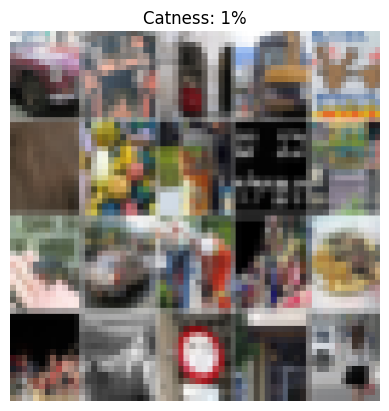

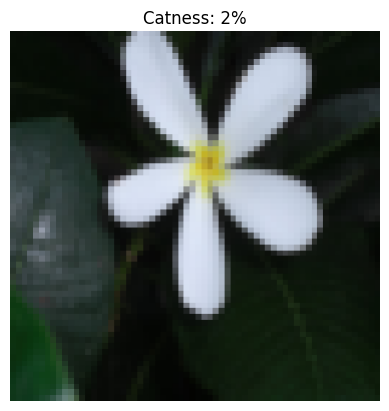

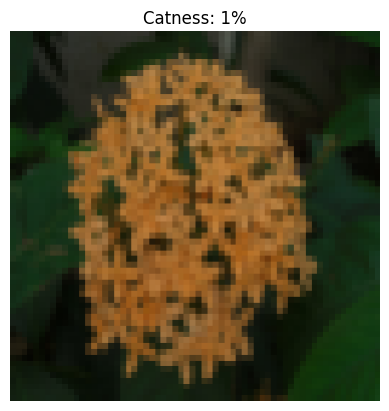

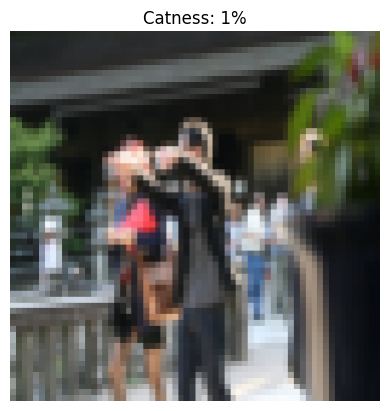

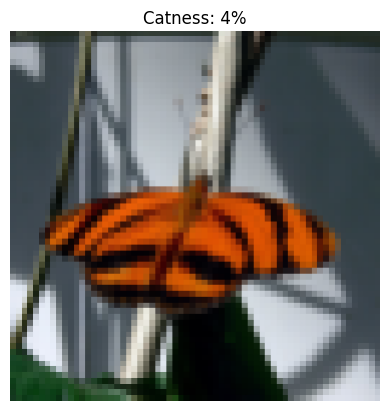

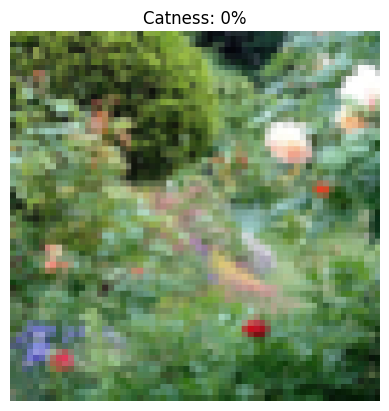

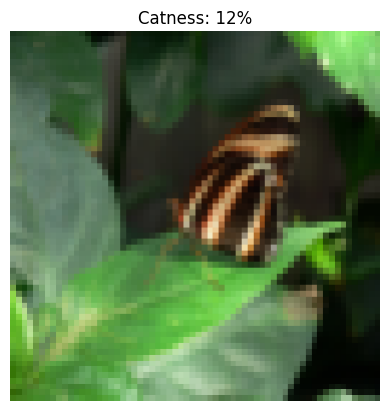

In [80]:
# Test with independent set

filenames = next(walk(getcwd() + r"\testdata\\"), (None, None, []))[2]
for name in filenames:
    predict_catness(getcwd() + r"\testdata\\" + name)